# *Offline Handwritten Text Recognition*

### The purpose of this notebook is to give a brief idea and a basic approach for offline handwritten text recognition by using segmentation and classification. 

## What is Offline Handwritten Text Recognition?
Offline handwriting recognition involves the automatic conversion of text in an image into letter codes that are usable within computer and text-processing applications. In simple terms, it is the text extraction from your handwritten notebooks/pages. Why called offline? The point being that there is an online text recognition system, which is referred for text that is digitally generated by using tools like stylus, apple pencil, etc.

## Approach

* **Step1** :  Build a digit(0-9) + A-Z characters classifier using a CNN architecture.
* **Step2** :  Apply character segmentation for the handwritten word image.
* **Step3** :  Classify each segmented letter and then get the final word in the image.

In [1]:
!pip install imutils

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [3]:
dir = r"C:\Users\Acer pc\Downloads\archive\train_v2"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [4]:
len(train_data)

4000

In [5]:
val_dir = r"C:\Users\Acer pc\Downloads\archive\validation_v2"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [6]:
len(val_data)

1000

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

In [8]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [9]:
train_Y

['train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',


In [10]:
train_X

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 200, 137, 255],
        [255, 255, 255, ..., 208, 239, 255],
        [255, 255, 255, ..., 253, 252, 255],
        ...,
        [255, 255, 255, ..., 251, 251, 255],
        [255, 255, 255, ..., 254, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [11]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [12]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [13]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [14]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [15]:
print(train_X.shape,val_X.shape)

(4000, 32, 32, 1) (1000, 32, 32, 1)


In [16]:
print(train_Y.shape,val_Y.shape)

(4000, 1) (1000, 1)


In [17]:
from keras.utils import to_categorical

# Assuming your original target labels are in train_Y and val_Y

num_classes = 35  # Number of classes in your dataset

train_Y = to_categorical(train_Y, num_classes)
val_Y = to_categorical(val_Y, num_classes)


In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [30]:
model.compile(loss='categorical_crossentropy', optimizer="sgd",metrics=['accuracy'])

In [31]:
history = model.fit(train_X,train_Y, epochs=10, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/10
125/125 [==============================] - 4s 26ms/step - loss: 0.2717 - accuracy: 0.9845 - val_loss: 3.0877e-04 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 3s 26ms/step - loss: 9.0423e-04 - accuracy: 1.0000 - val_loss: 9.9790e-05 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 3s 26ms/step - loss: 5.1099e-04 - accuracy: 1.0000 - val_loss: 4.9724e-05 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 3s 26ms/step - loss: 3.0892e-04 - accuracy: 1.0000 - val_loss: 3.1542e-05 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 3s 26ms/step - loss: 2.2243e-04 - accuracy: 1.0000 - val_loss: 2.2542e-05 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 3s 26ms/step - loss: 1.7746e-04 - accuracy: 1.0000 - val_loss: 1.7034e-05 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 3s 26ms/step - loss: 1.4027e-04 - accuracy: 

In [32]:
model.save('Offline_Handwritten.h5')

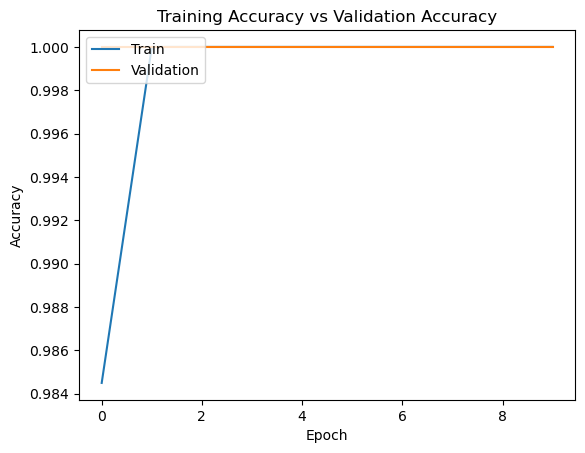

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

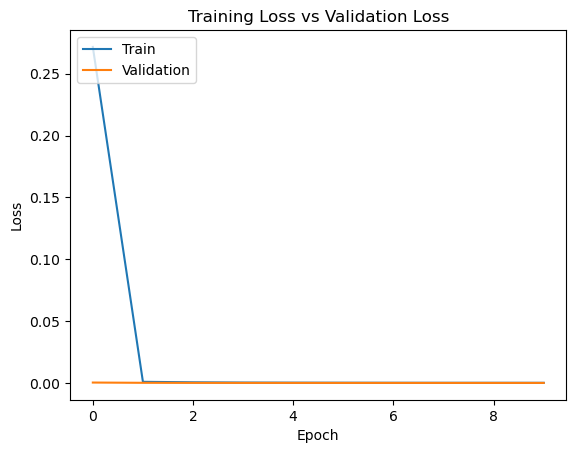

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the image
image_path = "C:\\Users\\Acer pc\\Downloads\\archive\\validation_v2\\validation\\VALIDATION_6457.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the input size of the model
image_height, image_width = 32, 32

# Resize the image to match the input size of the model
resized_image = cv2.resize(gray_image, (image_width, image_height))

# Preprocess the image
preprocessed_image = resized_image / 255.0  # Normalize pixel values to [0, 1]
preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)  # Add channel dimension

# Load the trained model
model = load_model("Offline_Handwritten.h5")

# Make predictions
predictions = model.predict(np.array([preprocessed_image]))

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
class_labels = ['class1', 'class2', 'class3', ...]  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)


1/1 [==============================] - 0s 99ms/step
Predicted class label: class1


1/1 [==============================] - 0s 62ms/step


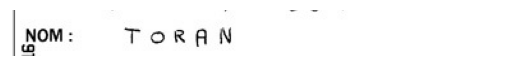

Predicted class label: class1


In [36]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the image
image_path = "C:\\Users\\Acer pc\\Downloads\\archive\\validation_v2\\validation\\VALIDATION_6457.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the input size of the model
image_height, image_width = 32, 32

# Resize the image to match the input size of the model
resized_image = cv2.resize(gray_image, (image_width, image_height))

# Preprocess the image
preprocessed_image = resized_image / 255.0  # Normalize pixel values to [0, 1]
preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)  # Add channel dimension

# Load the trained model
model = load_model("Offline_Handwritten.h5")

# Make predictions
predictions = model.predict(np.array([preprocessed_image]))

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
class_labels = ['class1', 'class2', 'class3', ...]  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print("Predicted class label:", predicted_class_label)


In [37]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create your model
model = keras.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(35, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)



In [42]:
# Perform data augmentation and train the model
model.fit(datagen.flow(train_X,train_Y, batch_size=32, subset='training'),
          steps_per_epoch=len(train_X) // 32,
          epochs=10,
          validation_data=datagen.flow(train_X,train_Y, batch_size=32, subset='validation'))


Epoch 1/10
125/125 [==============================] - 4s 25ms/step - loss: 0.2613 - accuracy: 0.9900 - val_loss: 0.0654 - val_accuracy: 1.0000


In [43]:
model.save('Offline_Handwritten.h6')

INFO:tensorflow:Assets written to: Offline_Handwritten.h6\assets


INFO:tensorflow:Assets written to: Offline_Handwritten.h6\assets
